In [37]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
songs = pd.read_csv('data.csv', index_col='id')
artist = pd.read_csv('data_by_artist.csv', index_col='artists')
genres = pd.read_csv('data_by_genres.csv', index_col='genres')
year = pd.read_csv('data_by_year.csv', index_col='year')
genres_a = pd.read_csv('data_w_genres.csv')

# Name of songs: complexity

In [39]:
def get_complexity(text):
    num_chars = len(text)
    tokenizer = RegexpTokenizer(r'\w+')
    word_list = tokenizer.tokenize(text)
    num_words = len(word_list)
    vocab = {x.lower() for x in word_list}
    try:
        avg_word_len = num_chars/num_words
        uniqueness = len(vocab)/num_words
        return len(vocab),avg_word_len,uniqueness
    
    # there are four cases where vocab=0, and the names of those songs are all signs
    except: 
        avg_word_len = num_chars/1  # treat num_words as 1
        uniqueness = 0 # set uniqueness=0 since there is only 1 sign in the 4 cases
        return len(vocab),avg_word_len,uniqueness

In [40]:
songs['vocab'] = songs['name'].apply(lambda x: get_complexity(x)[0])
songs['avg_word_len'] = songs['name'].apply(lambda x: get_complexity(x)[1])
songs['uniqueness'] = songs['name'].apply(lambda x: get_complexity(x)[2])

In [41]:
# songs.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,vocab,avg_word_len,uniqueness
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,4.295172,5.588362,0.984386
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,3.006754,1.675804,0.065203
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,2.000000,4.500000,1.000000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,4.000000,5.285714,1.000000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,5.000000,6.333333,1.000000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,34.000000,34.000000,1.000000


In [698]:
def freq(text):
    from nltk.tokenize import RegexpTokenizer
    word_comm = pd.read_csv('word_comm.csv')
    word_comm = word_comm.sort_values(by='freq')
    leng = word_comm['order'][len(word_comm)-1]
    comm = word_comm['word'].to_list()
    
    tokenizer = RegexpTokenizer(r'\w+')
    word_list = tokenizer.tokenize(text)
    word_list = [i.lower() for i in word_list]
    fre_ = []
    for word in word_list:
        if word in comm:
            fre = word_comm['order'][comm.index(word)]
            fre_.append(fre/leng)
    return sum(fre_)

In [699]:
songs['comm'] = songs['name'].apply(lambda x: freq(x))

In [723]:
# songs.to_csv(r'data_new_new.csv')

## Language

In [42]:
!pip install fasttext

In [51]:
def detect_lan(text):
    import fasttext
    fasttext.FastText.eprint = lambda x: None
    model = fasttext.load_model('lid.176.ftz')
    try:
        if model.predict(text)[0][0][-2:] == 'en':
            return 'English'
        else:
            return 'Other Languages'
    except:
        return 'N/A'

In [52]:
songs['language'] = songs['name'].apply(lambda x: detect_lan(x))

In [59]:
# songs.to_csv(r'data_updated.csv')

In [ ]:
def lan_prob(text):
    from langdetect import detect_langs
    try:
        lang_prob = detect_langs(text)
        return lang_prob
    except:
        return 'N/A'

# songs['lang_prob'] = songs['name'].apply(lambda x: lan_prob(x))

In [ ]:
def pot_mul_lang(x):
    if len(x) > 1:
        return x
    return 'Good'

# songs['pol_mul_lang'] = songs['lang_prob'].apply(lambda x: pot_mul_lang(x))

In [ ]:
songs[songs['language']=='English']

## Word Cloud of Songs Names

In [181]:
songs = pd.read_csv('data_updated.csv')

In [182]:
songs['decade'] = songs['year'].apply(lambda x: str((x//10)*10)+'s')

In [183]:
name_by_year = songs.groupby(['decade'])['name'].agg('sum')

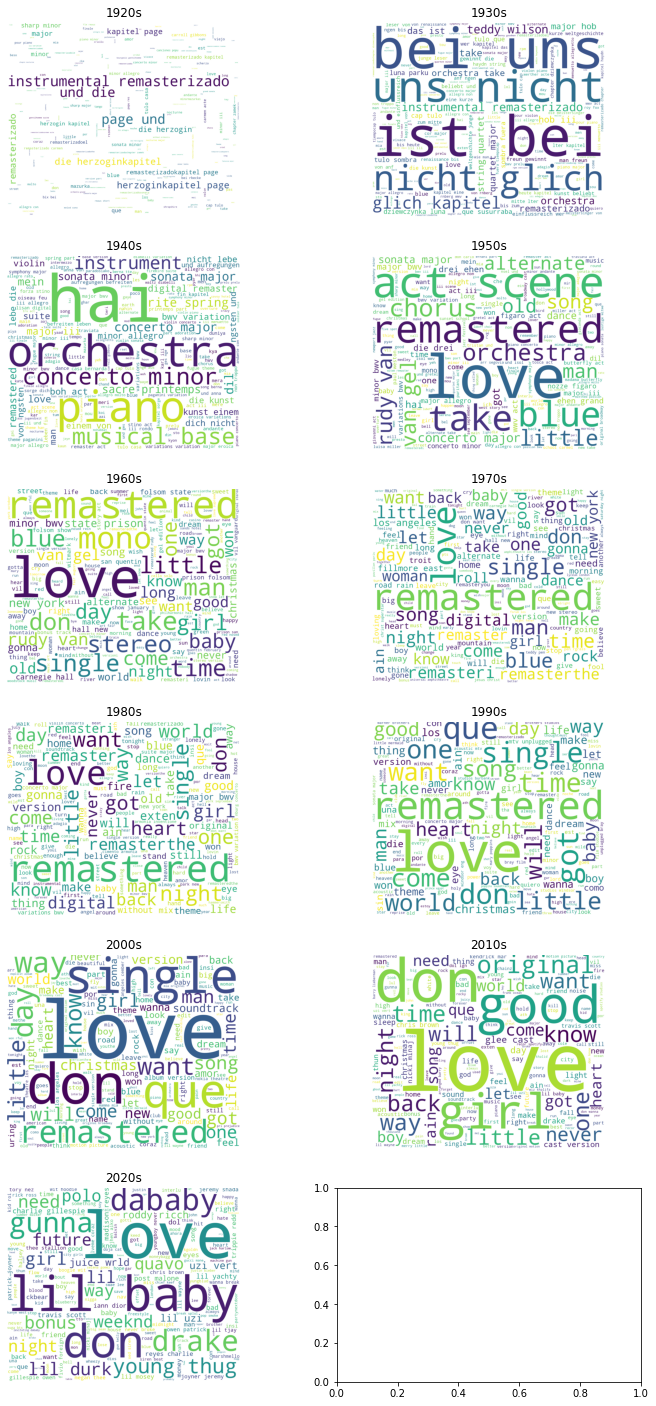

In [184]:
#Remove unwanted words
DELETE_WORDS = ['feat','Live','de','la','Remix','De','live','remix','radio','Radio']
def remove_words(text_string, DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string


MIN_LENGTH = 3
def remove_short_words(text_string, min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' ' + word + ' ', ' ', 1)
    return text_string

#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 6
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,25))

for i in range(len(name_by_year.index)):
    text_string = remove_words(name_by_year[name_by_year.index[i]])
    text_string = remove_short_words(text_string)
    ax = axes[i//2, i%2] 
    ax.set_title(name_by_year.index[i])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                          width=1200, height=1000).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

## Word Complexity Graph

In [174]:
songs['decade'] = songs['year'].apply(lambda x: str((x//10)*10)+'s')

In [176]:
comm_by_decade = songs.groupby(['decade'])['comm'].agg('mean')
wordlen_by_decade = songs.groupby(['decade'])['avg_word_len'].agg('mean')
uniq_by_decade = songs.groupby(['decade'])['uniqueness'].agg('mean')
voc_by_decade = songs.groupby(['decade'])['#vocab'].agg('mean')

In [179]:
df = pd.DataFrame([list(comm_by_decade),list(wordlen_by_decade),list(uniq_by_decade),list(voc_by_decade)])
df.columns = list(comm_by_decade.index)
df.index = ['comm','word_len','uniq','voc']
df = df.T

,comm,word_len,uniq,voc
1920s,0.822880,6.506360,0.983655,5.245220
1930s,0.771994,6.037799,0.982613,5.251230
1940s,0.906140,5.758035,0.973216,5.902523
1950s,1.211013,5.579177,0.979215,5.336776
1960s,1.346214,5.424713,0.981092,4.438999
1970s,1.272323,5.573742,0.986437,4.195850
1980s,1.170984,5.545880,0.986829,3.955617
1990s,1.012392,5.444586,0.987486,3.679162
2000s,0.998644,5.451460,0.987686,3.435305
2010s,0.930078,5.518447,0.990719,3.179377


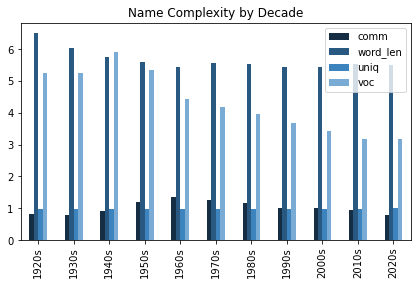

In [197]:
df.plot(kind='bar',title="Name Complexity by Decade", figsize=(7,4), 
        color=['#152e43','#295981','#3d84bf','#7aabd4'])